EDS 6342\
Group 9\
Default of Credit Card Clients


George Bittar - 1819062
Saikiran Anugam - 2312298


Dataset Information: (Provided by UCI) https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

This research aimed at the case of customer default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

Additional Variable Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 

This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("default of credit card clients.xls", header=1)  

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
# Display the first 5 rows of the dataset
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [5]:
# Summary statistics
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

### DATA CLEANING

From the Additional Variable Information Section, we are told that
X4: Marital status (1 = married; 2 = single; 3 = others).

Therefore, there should not be any values greater than 3 for education.

We will only keep rows where the value of education is less than or equal to 3.

In [6]:
# Assuming your DataFrame is named df
df = df[(df['EDUCATION'] >= 1) & (df['EDUCATION'] <= 4)]

Similarly, for MARRIAGE, the only allowed integers should be 1, 2, and 3.

In [7]:
df = df[(df['MARRIAGE'] >= 1) & (df['MARRIAGE'] <= 3)]

In [8]:
df = df[(df['SEX'] >= 1) & (df['SEX'] <= 2)]

In [9]:
df['default payment next month'] = df['default payment next month'].astype(int)

From the Additional Variable Information Section, we are told that\
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.\

Therefore, there should not be any negative numbers beside -1\

We will take the absolute value of all numbers beside -1.

In [10]:
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

df[pay_columns]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
29995,0,0,0,0,0,0
29996,-1,-1,-1,-1,0,0
29997,4,3,2,-1,0,0
29998,1,-1,0,0,0,-1


In [11]:
df[pay_columns] = df[pay_columns].applymap(lambda x: abs(x) if x != -1 else x)
df[pay_columns]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,2,2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
29995,0,0,0,0,0,0
29996,-1,-1,-1,-1,0,0
29997,4,3,2,-1,0,0
29998,1,-1,0,0,0,-1


### Exploratory Data Analysis

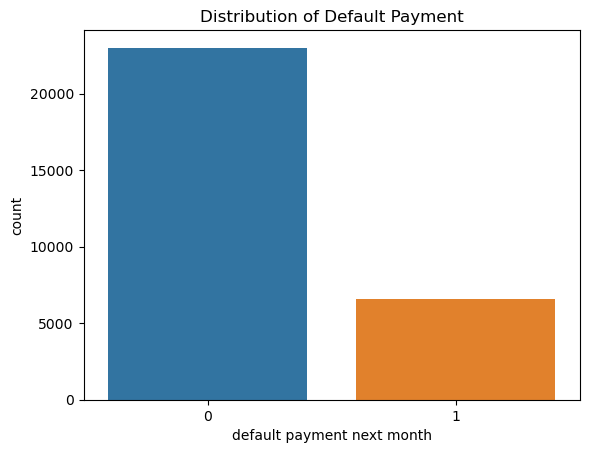

In [12]:
sns.countplot(x='default payment next month', data=df)
plt.title('Distribution of Default Payment')
plt.show()

From the plot above, we can see that the dataset is imbalanced. There are far more examples of no default payments vs default payments.

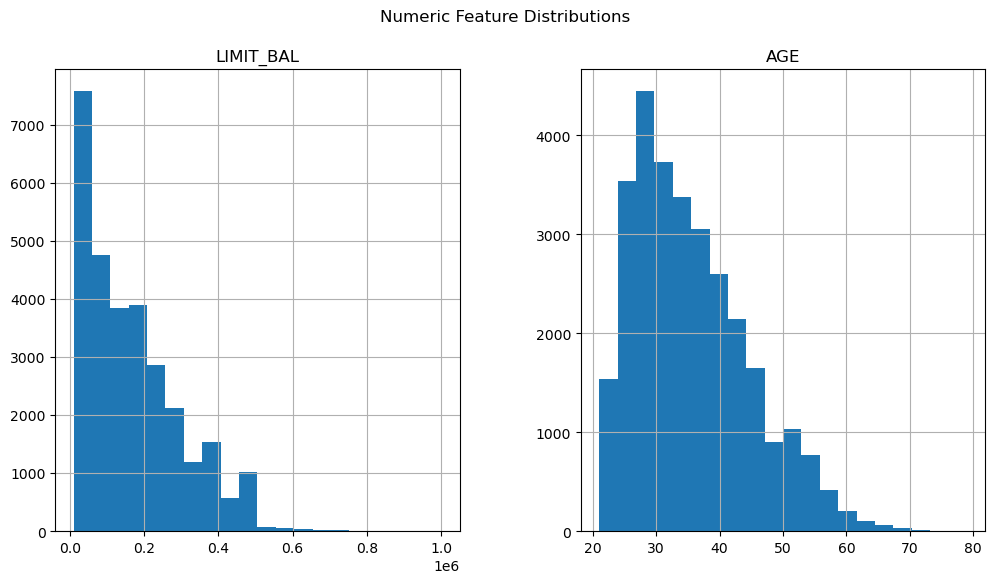

In [13]:
numeric_features = ['LIMIT_BAL', 'AGE']
df[numeric_features].hist(bins=20, figsize=(12, 6))
plt.suptitle('Numeric Feature Distributions')
plt.show()

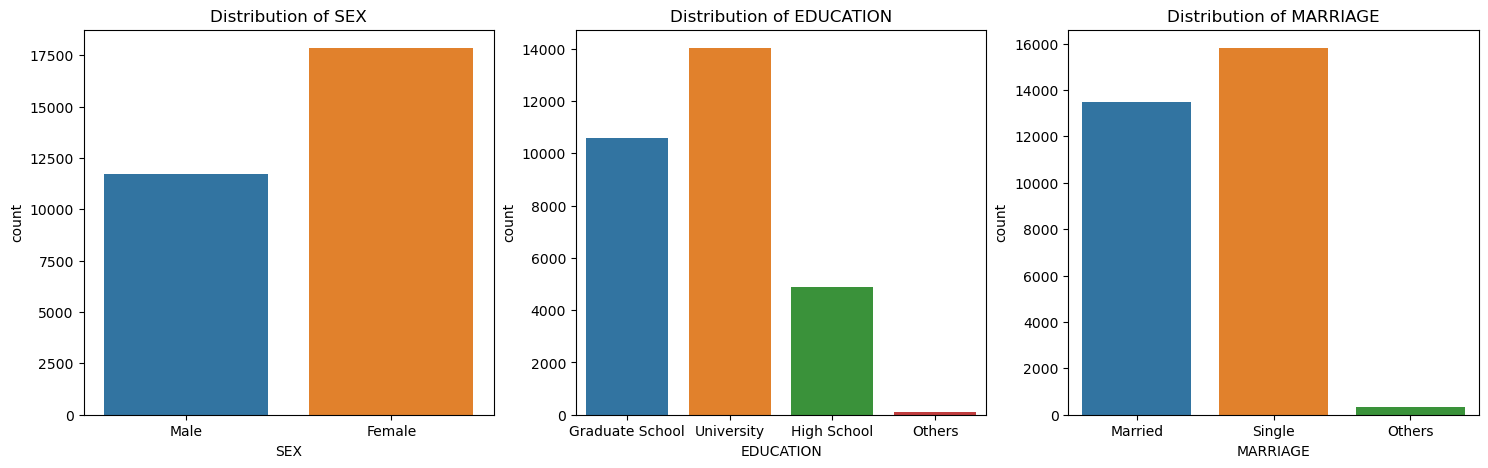

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the dataset

# Categorical feature distribution plots
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(18, 5))

# Add legends
legend_texts = {
    'SEX': {0: 'Male', 1: 'Female'},
    'EDUCATION': {0: 'Graduate School', 1: 'University', 2: 'High School', 3: 'Others'},
    'MARRIAGE': {0: 'Married', 1: 'Single', 2: 'Others'}
}

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xticks(list(legend_texts[feature].keys()))
    axes[i].set_xticklabels(list(legend_texts[feature].values()))

plt.show()


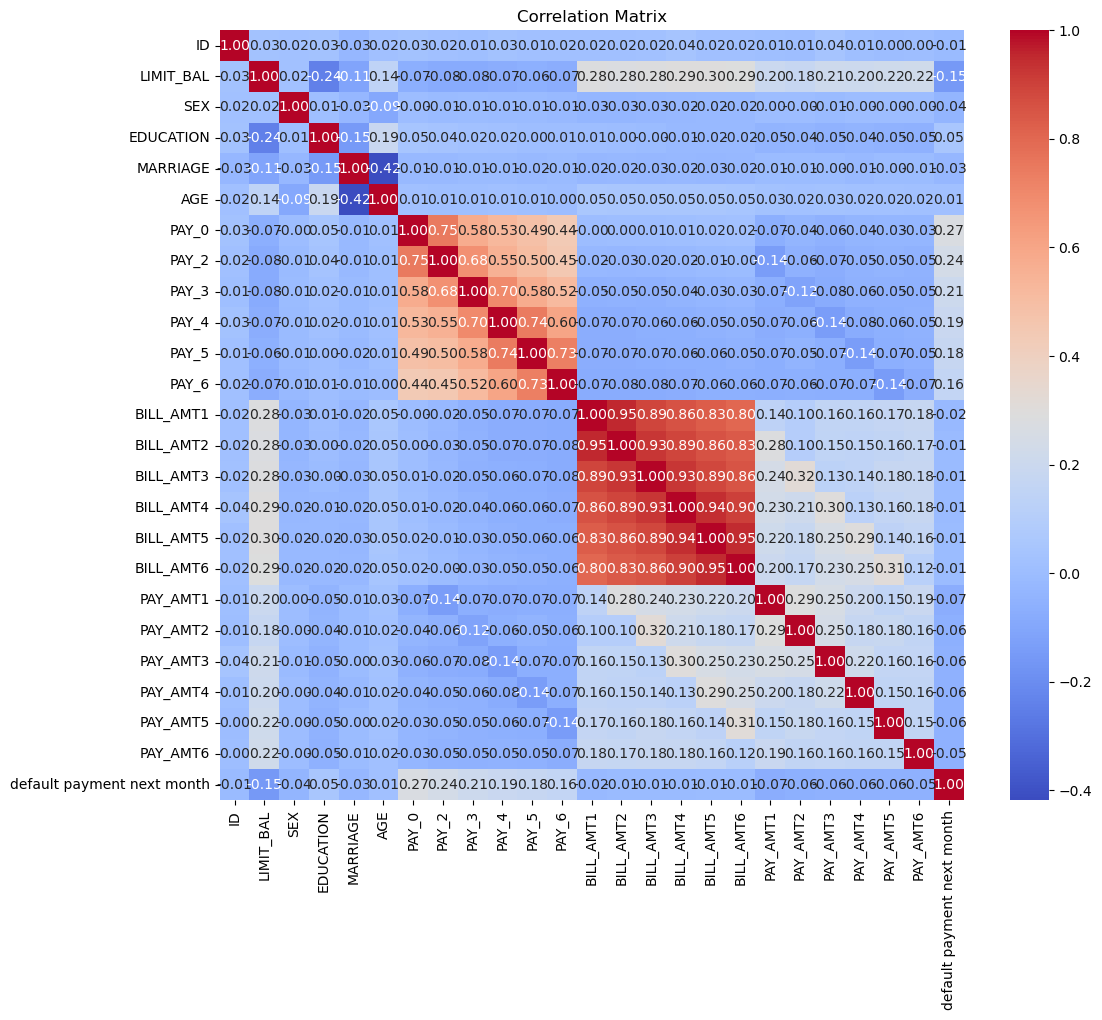

In [15]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In this case, the variables 'pay_0' through 'pay_6' represent the repayment status for different months.\
The variable 'bill_amt1' through 'bill_amt6' represent the amount of bill statement for the corresponding month.\
It's not surpising that there is a high correlation between these variables as a client's past repayment behavior is likely to be related throughout the months.

In [16]:
# Create a new feature representing the average delay in past payments
df['MODE_PAY_DELAY'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mode(axis=1).iloc[:, 0]

# Drop the original PAY_0 through PAY_6 columns
#df = df.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)

# Check the updated dataset
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0  ...          0          0         0       689         0         0   
1  ...       3455       3261         0      1000      1000      1000   
2  ...      14948      15549      1518      1500      1000      1000   
3  ...      28959      29547      2000      2019      1200      1100   
4  ...      19146      19131      2000     36681     10000      9000   

   PAY_AMT5  PAY_AMT6  default payment next month  MODE_PAY_DELAY  
0         0         0   

In [17]:
df['AVERAGE_BILL_AMOUNT'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
#df = df.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1)
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0  ...          0         0       689         0         0         0         0   
1  ...       3261         0      1000      1000      1000         0      2000   
2  ...      15549      1518      1500      1000      1000      1000      5000   
3  ...      29547      2000      2019      1200      1100      1069      1000   
4  ...      19131      2000     36681     10000      9000       689       679   

   default payment next month  MODE_PA

In [18]:
df['AVERAGE_PREV_PAYMENT'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
#df = df.drop(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0  ...         0       689         0         0         0         0   
1  ...         0      1000      1000      1000         0      2000   
2  ...      1518      1500      1000      1000      1000      5000   
3  ...      2000      2019      1200      1100      1069      1000   
4  ...      2000     36681     10000      9000       689       679   

   default payment next month  MODE_PAY_DELAY  AVERAGE_BILL_AMOUNT  \
0                           1     

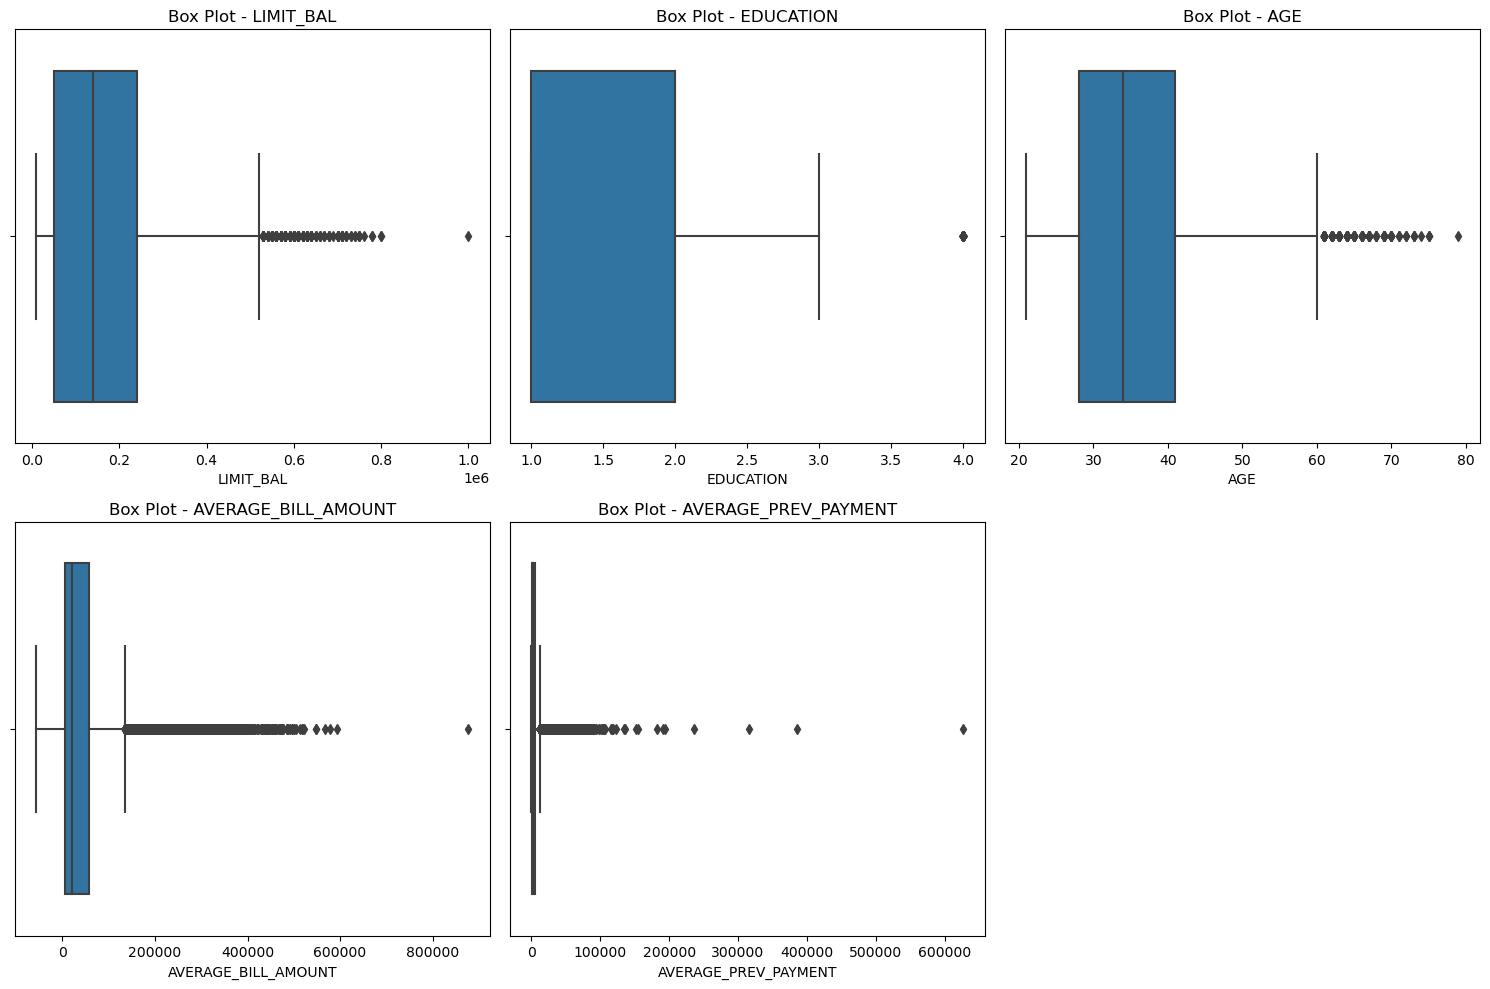

In [19]:
# Select columns for box plots
selected_columns = ['LIMIT_BAL', 'EDUCATION', 'AGE', 'AVERAGE_BILL_AMOUNT', 'AVERAGE_PREV_PAYMENT']

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Iterate through selected columns and generate box plots
for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)  # Adjust the subplot grid based on the number of selected columns
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot - {column}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import zscore


# Calculate z-scores for 'LIMIT_BAL' column
z_scores = zscore(df['LIMIT_BAL'])

# Set a threshold for identifying outliers (e.g., 3 standard deviations)
outlier_threshold = 3

# Identify and remove rows with 'LIMIT_BAL' z-scores beyond the threshold
df_no_outliers = df[(z_scores < outlier_threshold) & (z_scores > -outlier_threshold)]

# Display information about removed outliers
outliers_removed = df.shape[0] - df_no_outliers.shape[0]
print(f"Number of outliers removed: {outliers_removed}")

df = df_no_outliers
# Now df_no_outliers is your DataFrame without outliers in the 'LIMIT_BAL' column


Number of outliers removed: 130


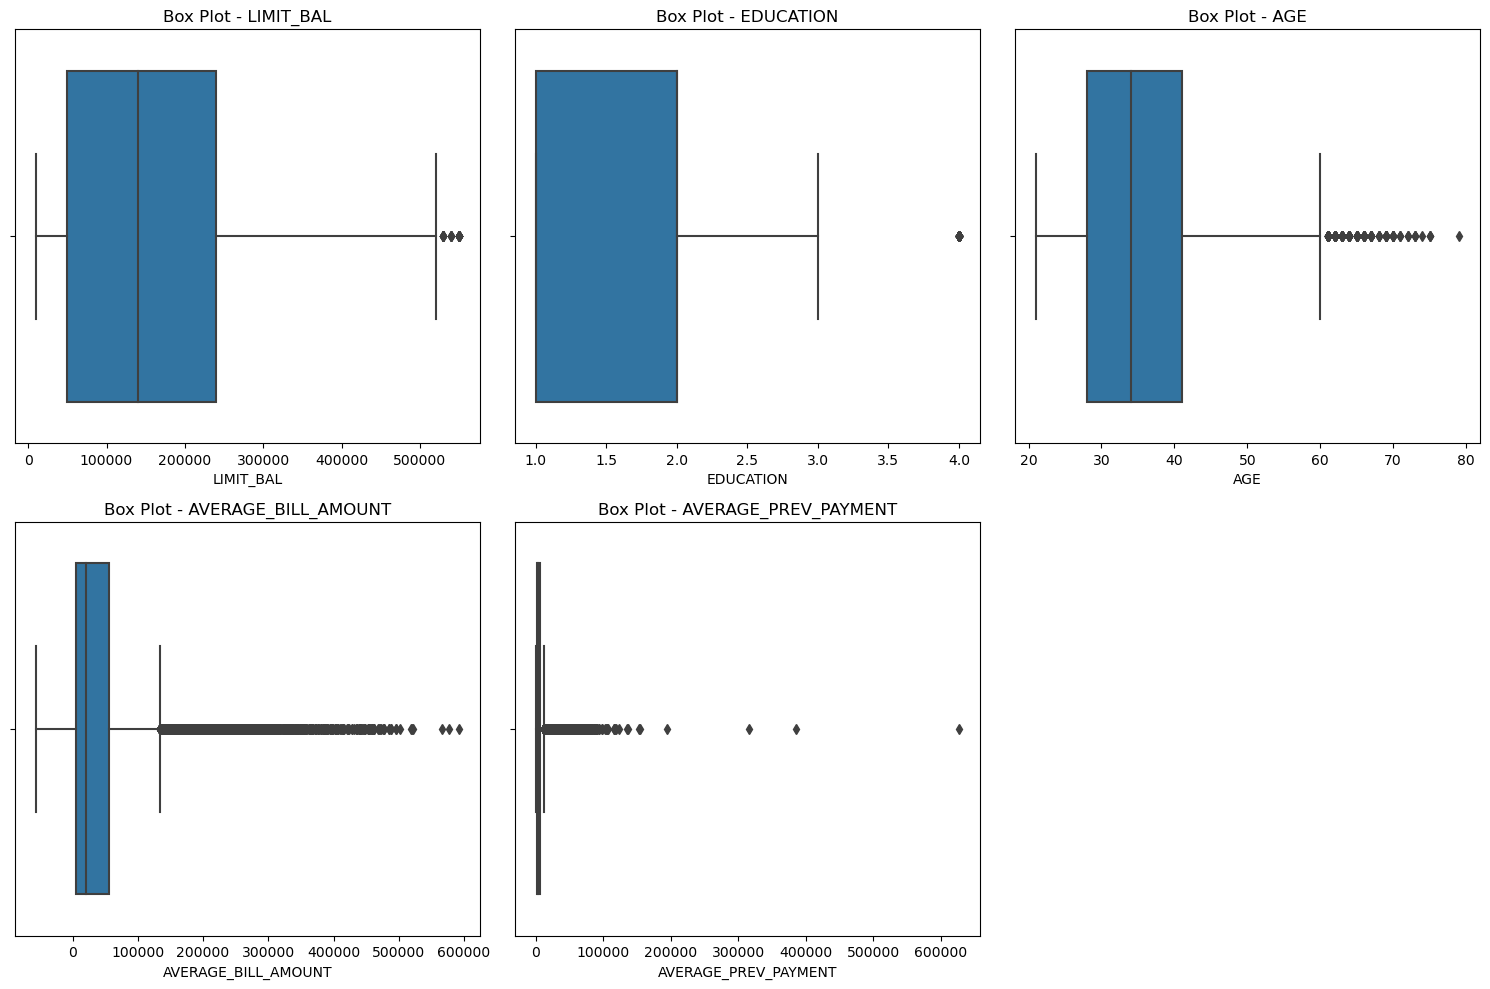

In [21]:
# Select columns for box plots
selected_columns = ['LIMIT_BAL', 'EDUCATION', 'AGE', 'AVERAGE_BILL_AMOUNT', 'AVERAGE_PREV_PAYMENT']

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Iterate through selected columns and generate box plots
for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)  # Adjust the subplot grid based on the number of selected columns
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot - {column}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Data Cleaning & Feature Creation is Complete! Let's save the cleaned data.

In [22]:
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
MODE_PAY_DELAY                0
AVERAGE_BILL_AMOUNT           0
AVERAGE_PREV_PAYMENT          0
dtype: int64


In [23]:
df.to_excel('default of credit card clients cleaned.xlsx', index=False)

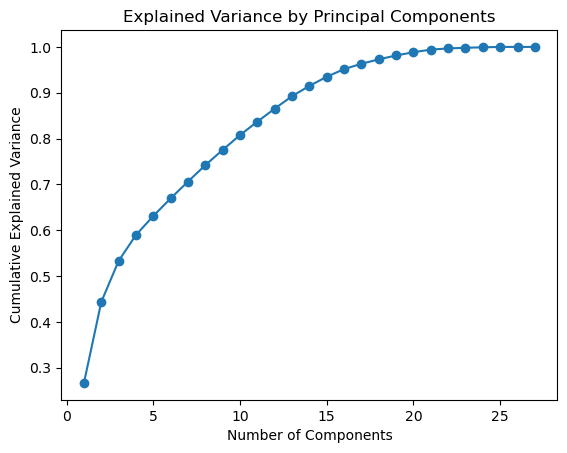

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

target_column = df['default payment next month']
features_for_pca = df.columns.drop(['default payment next month'])

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_for_pca])

# Apply PCA
#
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Determine the number of components to retain based on explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Visualize explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

The explained variance plot from PCA helps us decide how many principal components to include in our analysis. On the graph, the x-axis shows the number of components, and the y-axis shows the cumulative explained variance. We look for a point where adding more components doesn't significantly increase the explained variance. This is known as the elbow point. This helps us balance dimensionality reduction with retaining enough information for our analysis. It's a practical guide for choosing the right number of components to achieve our goals efficiently. In this case, it seems that 6 features is a good choice that balances the number of components and the cumulative explained variance.

In [25]:
n_components = 18
pca = PCA(n_components=n_components)
df_final_pca = pca.fit_transform(df_scaled)


# Incorporate the PCA components into the DataFrame
df_final_pca = pd.DataFrame(df_final_pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_final_pca.reset_index(drop=True, inplace=True)
target_column.reset_index(drop=True, inplace=True)

df_final = pd.concat([df_final_pca, target_column], axis=1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

y = df_final['default payment next month']
X = df_final.drop('default payment next month', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Logistic Regression with Grid Search
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_model = LogisticRegression()

grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
best_lr_model = grid_search_lr.best_estimator_

# Use the best model to make predictions
y_pred_lr = best_lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr, output_dict=True)

# Extract F1 score from classification report
f1_score_lr = classification_rep_lr['weighted avg']['f1-score']

# Print results
print("Best Parameters for Logistic Regression:", best_params_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print("Classification Report:")
print(classification_rep_lr)


Best Parameters for Logistic Regression: {'C': 10}
Logistic Regression Accuracy: 0.8044105173876166
Classification Report:
{'0': {'precision': 0.8122660010697094, 'recall': 0.9785223367697594, 'f1-score': 0.8876765708718947, 'support': 4656}, '1': {'precision': 0.6503496503496503, 'recall': 0.15012106537530268, 'f1-score': 0.24393442622950823, 'support': 1239}, 'accuracy': 0.8044105173876166, 'macro avg': {'precision': 0.7313078257096799, 'recall': 0.564321701072531, 'f1-score': 0.5658054985507015, 'support': 5895}, 'weighted avg': {'precision': 0.7782347273560278, 'recall': 0.8044105173876166, 'f1-score': 0.7523760590462939, 'support': 5895}}


In [30]:
classification_rep_lr = classification_report(y_test, y_pred_lr)
# Print results
print("Best Parameters for Logistic Regression:", best_params_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print("Classification Report:")
print(classification_rep_lr)

Best Parameters for Logistic Regression: {'C': 10}
Logistic Regression Accuracy: 0.8044105173876166
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4656
           1       0.65      0.15      0.24      1239

    accuracy                           0.80      5895
   macro avg       0.73      0.56      0.57      5895
weighted avg       0.78      0.80      0.75      5895



In [31]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_model = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

# Use the best model to make predictions
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt,output_dict=True)
f1_score_dt = classification_rep_dt['weighted avg']['f1-score']

# Print results
print("Best Parameters for Decision Tree:", best_params_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Classification Report:")
print(classification_rep_dt)

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Decision Tree Accuracy: 0.7981340118744699
Classification Report:
{'0': {'precision': 0.8322469325153374, 'recall': 0.9323453608247423, 'f1-score': 0.8794570502431118, 'support': 4656}, '1': {'precision': 0.5360824742268041, 'recall': 0.2937853107344633, 'f1-score': 0.3795620437956204, 'support': 1239}, 'accuracy': 0.7981340118744699, 'macro avg': {'precision': 0.6841647033710707, 'recall': 0.6130653357796028, 'f1-score': 0.6295095470193661, 'support': 5895}, 'weighted avg': {'precision': 0.76999964433561, 'recall': 0.7981340118744699, 'f1-score': 0.7743900590661073, 'support': 5895}}


In [32]:
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print results
print("Best Parameters for Decision Tree:", best_params_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Classification Report:")
print(classification_rep_dt)

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Decision Tree Accuracy: 0.7981340118744699
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4656
           1       0.54      0.29      0.38      1239

    accuracy                           0.80      5895
   macro avg       0.68      0.61      0.63      5895
weighted avg       0.77      0.80      0.77      5895



In [33]:
from sklearn.svm import SVC

# SVM with Grid Search
param_grid_svm = {'C': [0.1], 'kernel': ['linear', 'rbf']}
svm_model = SVC()

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

# Use the best model to make predictions
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm,output_dict=True)
f1_score_svm = classification_rep_svm['weighted avg']['f1-score']

# Print results
print("Best Parameters for SVM:", best_params_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print("Classification Report:")
print(classification_rep_svm)

Best Parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
SVM Accuracy: 0.8086513994910941
Classification Report:
{'0': {'precision': 0.8215457528253737, 'recall': 0.9679982817869416, 'f1-score': 0.8887793334647998, 'support': 4656}, '1': {'precision': 0.6356968215158925, 'recall': 0.20984665052461662, 'f1-score': 0.3155339805825243, 'support': 1239}, 'accuracy': 0.8086513994910941, 'macro avg': {'precision': 0.728621287170633, 'recall': 0.5889224661557791, 'f1-score': 0.6021566570236621, 'support': 5895}, 'weighted avg': {'precision': 0.7824843743872995, 'recall': 0.8086513994910941, 'f1-score': 0.7682957045892884, 'support': 5895}}


In [34]:
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Print results
print("Best Parameters for SVM:", best_params_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print("Classification Report:")
print(classification_rep_svm)

Best Parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
SVM Accuracy: 0.8086513994910941
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4656
           1       0.64      0.21      0.32      1239

    accuracy                           0.81      5895
   macro avg       0.73      0.59      0.60      5895
weighted avg       0.78      0.81      0.77      5895



In [35]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with Grid Search
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [10, 20]}
rf_model = RandomForestClassifier()

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Use the best model to make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf,output_dict=True)
f1_score_rf = classification_rep_rf['weighted avg']['f1-score']

# Print results
print("Best Parameters for Random Forest:", best_params_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Classification Report:")
print(classification_rep_rf)


Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Random Forest Accuracy: 0.8171331636980492
Classification Report:
{'0': {'precision': 0.836404663407296, 'recall': 0.9553264604810997, 'f1-score': 0.8919189893723682, 'support': 4656}, '1': {'precision': 0.6395147313691508, 'recall': 0.29782082324455206, 'f1-score': 0.40638766519823794, 'support': 1239}, 'accuracy': 0.8171331636980492, 'macro avg': {'precision': 0.7379596973882234, 'recall': 0.6265736418628258, 'f1-score': 0.6491533272853031, 'support': 5895}, 'weighted avg': {'precision': 0.7950227082257418, 'recall': 0.8171331636980492, 'f1-score': 0.7898709298894594, 'support': 5895}}


In [36]:
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Best Parameters for Random Forest:", best_params_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Classification Report:")
print(classification_rep_rf)

Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Random Forest Accuracy: 0.8171331636980492
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4656
           1       0.64      0.30      0.41      1239

    accuracy                           0.82      5895
   macro avg       0.74      0.63      0.65      5895
weighted avg       0.80      0.82      0.79      5895



In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_model_evaluation(y_true, y_pred, model_name):
    """
    Generate confusion matrix heatmap, ROC curve, and feature importance plot (for Random Forests).

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels or probabilities
    - model_name: Name of the model for plot titles
    """
    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_pred if len(y_pred.shape) == 1 else y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 3, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()


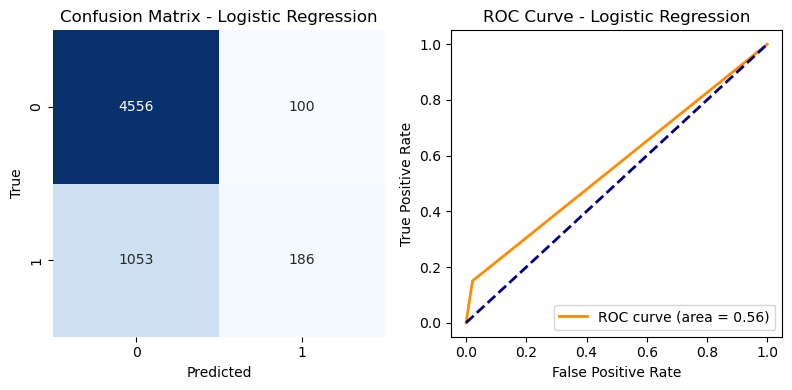

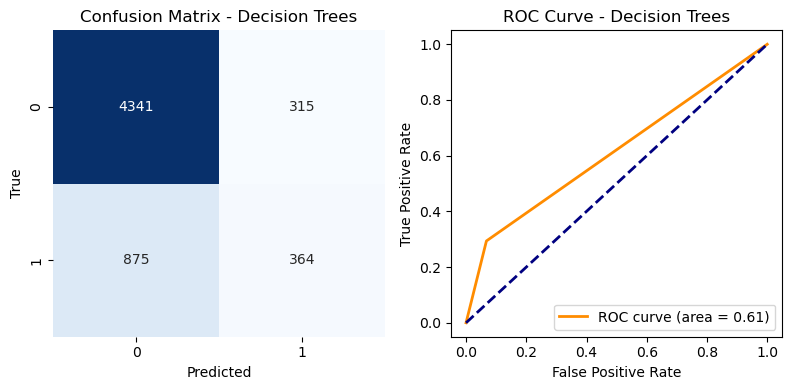

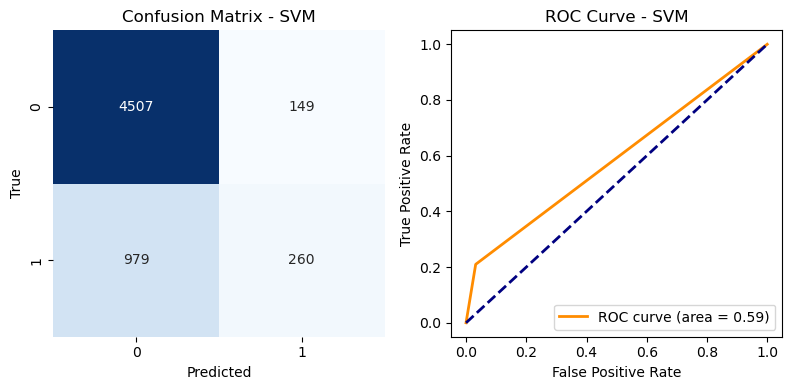

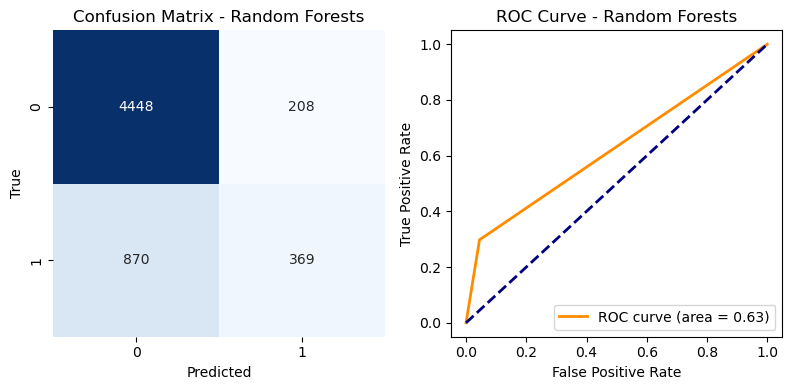

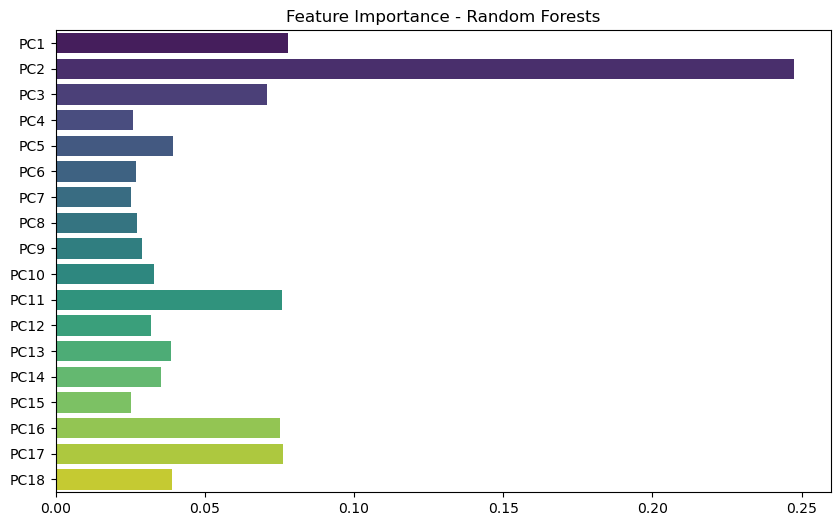

In [38]:
# Example usage for Logistic Regression
y_pred_lr = best_lr_model.predict(X_test)
plot_model_evaluation(y_test, y_pred_lr, 'Logistic Regression')

# Example usage for Decision Trees
y_pred_dt = best_dt_model.predict(X_test)
plot_model_evaluation(y_test, y_pred_dt, 'Decision Trees')

# Example usage for SVM
y_pred_svm = best_svm_model.predict(X_test)
plot_model_evaluation(y_test, y_pred_svm, 'SVM')

# Example usage for Random Forests
y_pred_rf = best_rf_model.predict(X_test)
plot_model_evaluation(y_test, y_pred_rf, 'Random Forests')


# Feature importance for Random Forests
feature_importance_rf = best_rf_model.feature_importances_
features = df_final_pca.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=features, palette='viridis')
plt.title('Feature Importance - Random Forests')
plt.show()


In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    
    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune number of units separately
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation=hp.Choice('activation', ['relu', 'tanh'])))
        model.add(layers.Dropout(rate=0.25))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Instantiate the tuner and perform hypertuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2,
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy}")


C:\Users\georg\AppData\Local\Temp\ipykernel_23884\512476688.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Reloading Tuner from .\untitled_project\tuner0.json
185/185 [==============================] - 0s 743us/step - loss: 0.4462 - accuracy: 0.8200
Accuracy on test data: 0.8200169801712036


1. **Dense layers**: These are the hidden layers of the neural network, which receives the data from the input layer. The Dense layer is a fully connected layer, which means that each neuron in the layer is connected to every neuron in the previous layer. The activation function used in this layer is relu, which stands for rectified linear unit, or tanh.

2. **Dropout layer**: This is a regularization technique that helps prevent overfitting in the neural network. The Droupout layer randomly drops out a fraction of the neurons in the previous layer during training. We set the dropout rate to 0.25, which means that 25% of the neurons in the previous layer will be dropped out during training.

3. **Dense layer**: This is the second hidden layer of the neural network, which receives the output from the previous layer. The activation function used in this layer is also xxx.

4. **Dropout layer**: This is another Dropout layer that randomly drops out a fraction of the neurons in the previous layer during training. In your code, you have set the dropout rate to 0.5.

5. **Dense layer with 1 neuron**: This is the output layer of the neural network, which produces the output. The activation function used in this layer is sigmoid, which is suitable for binary classification problems.

185/185 [==============================] - 0s 618us/step
Accuracy: 0.8200
F1 Score: 0.3989
185/185 [==============================] - 0s 666us/step


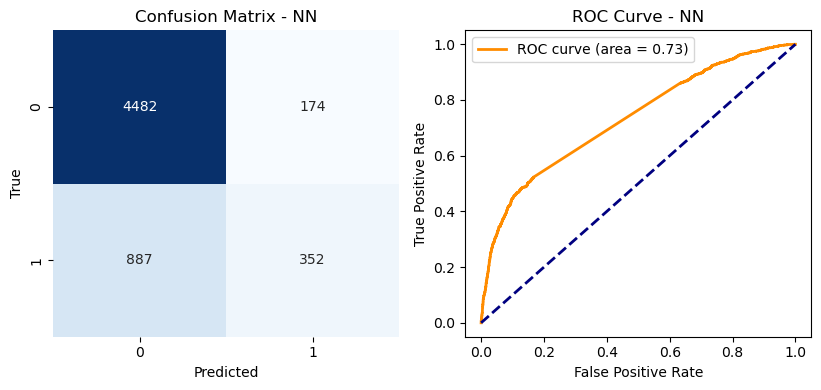

In [40]:
from sklearn.metrics import f1_score

plt.figure(figsize=(12, 4))

# Confusion Matrix
y_pred_nn_probs = best_model.predict(X_test)
y_pred_nn = (y_pred_nn_probs > 0.5).astype(int)
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.subplot(1, 3, 2)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - NN')
plt.xlabel('Predicted')
plt.ylabel('True')

accuracy_nn = accuracy_score(y_test, y_pred_nn)
classification_rep_nn = classification_report(y_test, y_pred_nn,output_dict=True)
f1_score_nn = classification_rep_rf['weighted avg']['f1-score']
print(f'Accuracy: {accuracy_nn:.4f}')
print(f'F1 Score: {f1_score_nn:.4f}')

# ROC Curve and AUC
fpr_nn, tpr_nn, _ = roc_curve(y_test, best_model.predict(X_test))
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.subplot(1, 3, 3)
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - NN')
plt.legend()

plt.tight_layout()
plt.show()


In [50]:
classification_rep_nn = classification_report(y_test, y_pred_nn)

best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]

best_hyperparameters = best_trial.hyperparameters.values
print("Hyperparameters of the best model:")
print(best_hyperparameters)
print(f"Neural Network Accuracy: {accuracy_nn}")
print("Classification Report:")
print(classification_rep_nn)


Hyperparameters of the best model:
{'num_layers': 2, 'units_0': 288, 'activation': 'relu', 'learning_rate': 0.01, 'units_1': 384, 'units_2': 320}
Neural Network Accuracy: 0.8200169635284139
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4656
           1       0.67      0.28      0.40      1239

    accuracy                           0.82      5895
   macro avg       0.75      0.62      0.65      5895
weighted avg       0.80      0.82      0.79      5895



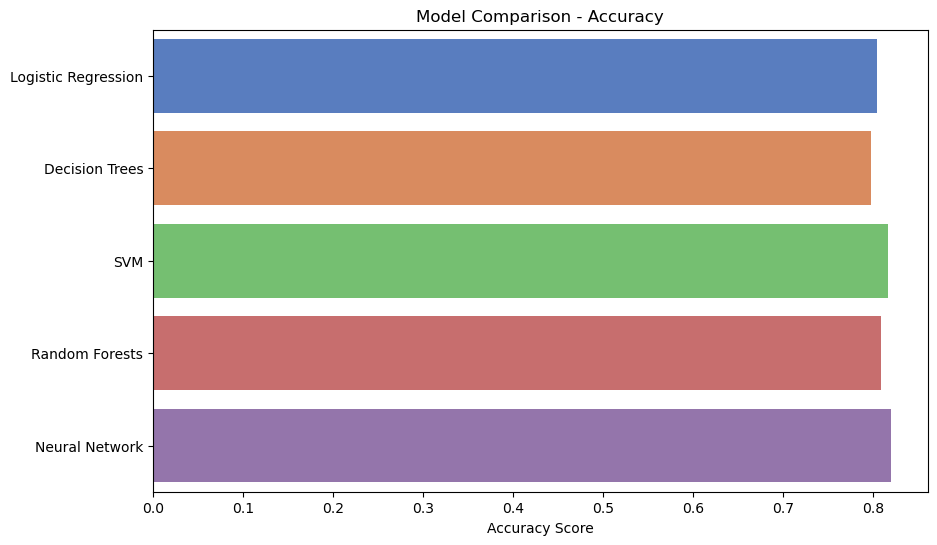

In [42]:
# Model comparison plot
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm,accuracy_nn]
models = ['Logistic Regression', 'Decision Trees', 'SVM', 'Random Forests','Neural Network']

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=models, palette='muted')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Accuracy Score')
plt.show()


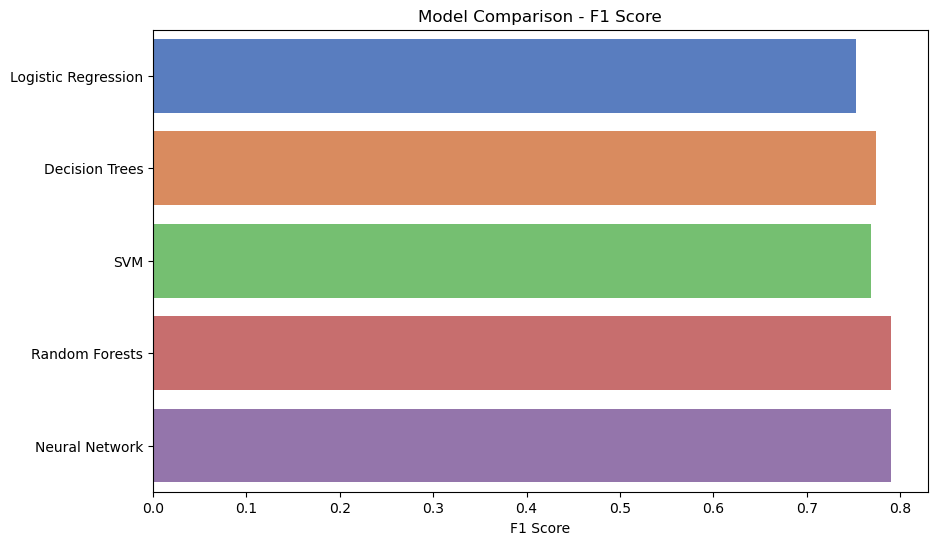

In [49]:
# Model comparison plot
f1_scores = [f1_score_lr, f1_score_dt, f1_score_svm, f1_score_rf,f1_score_nn]
models = ['Logistic Regression', 'Decision Trees', 'SVM', 'Random Forests','Neural Network']

plt.figure(figsize=(10, 6))
sns.barplot(x=f1_scores, y=models, palette='muted')
plt.title('Model Comparison - F1 Score')
plt.xlabel('F1 Score')
plt.show()
